In [110]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [111]:
print(tf.__version__)

1.15.0


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [113]:
#data = [[[i+j]for i in range(5)]for j in range(100)]
#data
#target = [(i+5) for i in range(100)]
#target

In [163]:
data = pd.read_csv("C:/Users/2019AFT/LSTM/LSTM_DATA_SET/predict_data.csv",encoding='CP949')
data =data.fillna(0) # 데이터에 nan 값 전부 0처리 

In [164]:
#data = np.array(data,dtype=float)
#target = np.array(target, dtype =float)

In [165]:
data.head()

,hour,minutes,count,rental/return,holiday,weather,Rain,Month,Day,Day_w,Time_X,AM/PM,humidity,wind,Snow,X,Time,Time.1
0,0,0,20.000000,0,2,-3.2,0.0,1,1,1,0:00,1,40.0,0.5,0.0,2018-01-01,1 / 01 00 : 00,1 / 01 00 : 00 00 : 00
1,0,30,20.500000,0,2,-3.2,0.0,1,1,1,0:30,1,40.0,0.5,0.0,2018-01-01,1 / 01 00 : 30,1 / 01 00 : 30 00 : 00
2,1,0,20.000000,1,2,-3.3,0.0,1,1,1,1:00,1,41.0,0.7,0.0,2018-01-01,1 / 01 01 : 00,1 / 01 01 : 00 00 : 00
3,2,0,16.250000,-1,2,-3.7,0.0,1,1,1,2:00,1,42.0,0.9,0.0,2018-01-01,1 / 01 02 : 00,1 / 01 02 : 00 00 : 00
4,2,30,13.833333,-5,2,-3.7,0.0,1,1,1,2:30,1,42.0,0.9,0.0,2018-01-01,1 / 01 02 : 30,1 / 01 02 : 30 00 : 00


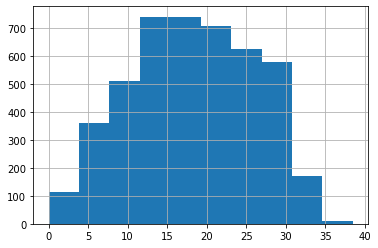

In [166]:
data['count'].hist()

In [167]:
data = data.drop(["Time_X"], axis=1)
data = data.drop(["Time.1"],axis=1)
data = data.drop(["X"],axis=1)

In [168]:
# data['Time']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559 entries, 0 to 4558
Data columns (total 15 columns):
hour             4559 non-null int64
minutes          4559 non-null int64
count            4559 non-null float64
rental/return    4559 non-null int64
holiday          4559 non-null int64
weather          4559 non-null float64
Rain             4559 non-null float64
Month            4559 non-null int64
Day              4559 non-null int64
Day_w            4559 non-null int64
AM/PM            4559 non-null int64
humidity         4559 non-null float64
wind             4559 non-null float64
Snow             4559 non-null float64
Time             4559 non-null object
dtypes: float64(6), int64(8), object(1)
memory usage: 534.4+ KB


In [169]:
# 데이터에서 년,월,일 시,분,초를 인덱스로 
data['Time']
data = data.set_index(['Time'])
data.index = pd.to_datetime(data.index)
data.head()

ParserError: Unknown string format: 1 / 01 00 : 00 

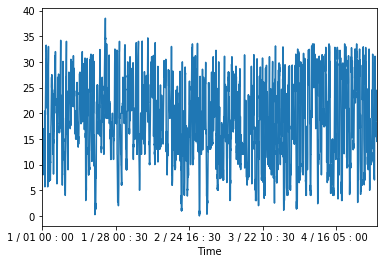

In [170]:
data['count'].plot()

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4559 entries, 1 / 01 00 : 00  to 4 / 30 23 : 30 
Data columns (total 14 columns):
hour             4559 non-null int64
minutes          4559 non-null int64
count            4559 non-null float64
rental/return    4559 non-null int64
holiday          4559 non-null int64
weather          4559 non-null float64
Rain             4559 non-null float64
Month            4559 non-null int64
Day              4559 non-null int64
Day_w            4559 non-null int64
AM/PM            4559 non-null int64
humidity         4559 non-null float64
wind             4559 non-null float64
Snow             4559 non-null float64
dtypes: float64(6), int64(8)
memory usage: 534.3+ KB


In [172]:
x = data.drop(["count"], axis=1)
y = data["count"].astype(int)

In [173]:
#x.reshape(1,4559,14)
x = np.array(x,dtype= int)
y = np.array(y,dtype = int)
x = x.reshape(4559,1,13)
x.shape


(4559, 1, 13)

In [174]:
x[0]

array([[ 0,  0,  0,  2, -3,  0,  1,  1,  1,  1, 40,  0,  0]])

In [195]:
# for i in range(2,len(x)):
#     if(4559% i == 0):
#         print(i)
#         break
x = [[x[i+j]for i in range(10)] for j in range(4549)]
x

[[array([[ 0,  0,  0,  2, -3,  0,  1,  1,  1,  1, 40,  0,  0]]),
  array([[ 0, 30,  0,  2, -3,  0,  1,  1,  1,  1, 40,  0,  0]]),
  array([[ 1,  0,  1,  2, -3,  0,  1,  1,  1,  1, 41,  0,  0]]),
  array([[ 2,  0, -1,  2, -3,  0,  1,  1,  1,  1, 42,  0,  0]]),
  array([[ 2, 30, -5,  2, -3,  0,  1,  1,  1,  1, 42,  0,  0]]),
  array([[ 3,  0, -2,  2, -4,  0,  1,  1,  1,  1, 44,  1,  0]]),
  array([[ 3, 30, -2,  2, -4,  0,  1,  1,  1,  1, 44,  1,  0]]),
  array([[ 4,  0, -2,  2, -4,  0,  1,  1,  1,  1, 53,  1,  0]]),
  array([[ 4, 30,  0,  2, -4,  0,  1,  1,  1,  1, 53,  1,  0]]),
  array([[ 6,  0,  1,  2, -4,  0,  1,  1,  1,  1, 51,  1,  0]])],
 [array([[ 0, 30,  0,  2, -3,  0,  1,  1,  1,  1, 40,  0,  0]]),
  array([[ 1,  0,  1,  2, -3,  0,  1,  1,  1,  1, 41,  0,  0]]),
  array([[ 2,  0, -1,  2, -3,  0,  1,  1,  1,  1, 42,  0,  0]]),
  array([[ 2, 30, -5,  2, -3,  0,  1,  1,  1,  1, 42,  0,  0]]),
  array([[ 3,  0, -2,  2, -4,  0,  1,  1,  1,  1, 44,  1,  0]]),
  array([[ 3, 30, -2,  2

In [264]:
"""from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

#sc.fit_transform(x)
sc.transform(x)
x.head()
"""

'from sklearn.preprocessing import MinMaxScaler\n\nsc = MinMaxScaler()\n\n#sc.fit_transform(x)\nsc.transform(x)\nx.head()\n'

In [196]:

x = np.array(x)
x = np.reshape(x,(4549,10,13))
x.shape

(4549, 10, 13)

In [197]:
x.shape

(4549, 10, 13)

In [198]:
for i in range(4559,4548,-1):
    y = np.delete(y,i)


IndexError: index 4559 is out of bounds for axis 0 with size 4549

In [199]:
y.shape

(4549,)

In [200]:
#train,validation,test set 으로 나눔  
import numpy as np
train_size = int(len(y)* 0.6)
val_size = int(len(y)*0.8)
test_size = len(y)- val_size
print(train_size,",",val_size,",",test_size)
#####################################
# train, test 나누기#
##########################33
#split to train and testing

x_train, x_test = np.array(x[0:train_size]),np.array(x[val_size:])
x_val, y_val = np.array(x[train_size:val_size]),np.array(y[train_size:val_size])
y_train, y_test = np.array(y[0:train_size]),np.array(y[val_size:])

2729 , 3639 , 910


In [201]:
y_test.shape

(910,)

In [202]:
# x_train = np.reshape(x_train, (5,1,13))
x_train[0]

array([[ 0,  0,  0,  2, -3,  0,  1,  1,  1,  1, 40,  0,  0],
       [ 0, 30,  0,  2, -3,  0,  1,  1,  1,  1, 40,  0,  0],
       [ 1,  0,  1,  2, -3,  0,  1,  1,  1,  1, 41,  0,  0],
       [ 2,  0, -1,  2, -3,  0,  1,  1,  1,  1, 42,  0,  0],
       [ 2, 30, -5,  2, -3,  0,  1,  1,  1,  1, 42,  0,  0],
       [ 3,  0, -2,  2, -4,  0,  1,  1,  1,  1, 44,  1,  0],
       [ 3, 30, -2,  2, -4,  0,  1,  1,  1,  1, 44,  1,  0],
       [ 4,  0, -2,  2, -4,  0,  1,  1,  1,  1, 53,  1,  0],
       [ 4, 30,  0,  2, -4,  0,  1,  1,  1,  1, 53,  1,  0],
       [ 6,  0,  1,  2, -4,  0,  1,  1,  1,  1, 51,  1,  0]])

(2729, 10, 13)

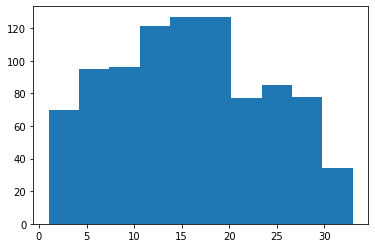

In [203]:
plt.hist(y_val)
x_train.shape

In [39]:
# 순환 신경망
model = Sequential()
model.add(LSTM(units =4,
              batch_input_shape= (None,5,13),
              return_sequences = True))
model.add(LSTM(32,
              batch_input_shape= (None,5,13),
              return_sequences =False))
model.add(Dropout(0.3))
model.add(Dense(1)) # output = 1






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [204]:
# 2. 모델 구성하기
look_back = 10
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(None, look_back, 13), stateful=False, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(None, look_back, 13), stateful=False))
model.add(Dropout(0.3))
model.add(Dense(1))


In [205]:
model.compile(loss = "mse",
             optimizer = 'adam',
             metrics = ['accuracy'])

In [206]:
#모델정보 요약
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 10, 32)            5888      
_________________________________________________________________
dropout_14 (Dropout)         (None, 10, 32)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 10, 32)            8320      
_________________________________________________________________
dropout_15 (Dropout)         (None, 10, 32)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total para

In [207]:
history = model.fit(x_train,y_train,epochs = 50, validation_data = (x_val,y_val))

Train on 2729 samples, validate on 910 samples
Epoch 1/50
2729/2729 [==============================] - 7s 3ms/step - loss: 211.3714 - acc: 0.0169 - val_loss: 95.7436 - val_acc: 0.0330
Epoch 2/50
2729/2729 [==============================] - 3s 1ms/step - loss: 99.9072 - acc: 0.0330 - val_loss: 73.2150 - val_acc: 0.0484
Epoch 3/50
2729/2729 [==============================] - 3s 1ms/step - loss: 75.5941 - acc: 0.0480 - val_loss: 65.1029 - val_acc: 0.0429
Epoch 4/50
2729/2729 [==============================] - 3s 1ms/step - loss: 63.1342 - acc: 0.0517 - val_loss: 63.5664 - val_acc: 0.0451
Epoch 5/50
2729/2729 [==============================] - 3s 1ms/step - loss: 59.0279 - acc: 0.0498 - val_loss: 64.5994 - val_acc: 0.0385
Epoch 6/50
2729/2729 [==============================] - 3s 933us/step - loss: 55.9186 - acc: 0.0520 - val_loss: 66.1018 - val_acc: 0.0385
Epoch 7/50
2729/2729 [==============================] - 3s 1ms/step - loss: 55.8511 - acc: 0.0509 - val_loss: 67.3193 - val_acc: 0.038

In [208]:
# 모델의 예측 값
results = model.predict(x_test)

(array([ 13.,  34.,  84., 139., 150., 156.,  97.,  98.,  89.,  50.]),
 array([ 3.9505036,  6.01443  ,  8.078357 , 10.142283 , 12.20621  ,
        14.270137 , 16.334063 , 18.39799  , 20.461916 , 22.525843 ,
        24.58977  ], dtype=float32),
 <a list of 10 Patch objects>)

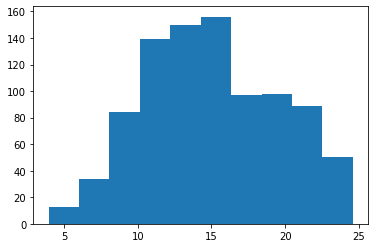

In [209]:
plt.hist(results)

In [211]:
import matplotlib as plt

In [212]:
import matplotlib.pyplot as plt 

In [213]:
y_test.shape

(910,)

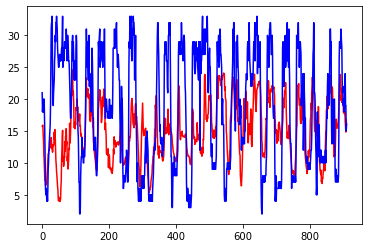

In [214]:
plt.plot(range(len(x_test)),results,c='r')
plt.plot(range(len(x_test)),y_test,c='b')

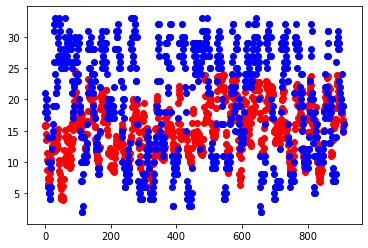

In [215]:
plt.scatter(range(len(x_test)),results, c='r')
plt.scatter(range(len(x_test)),y_test,c='b')
plt.show()

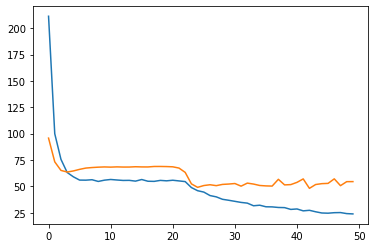

In [216]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [217]:
# 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  [15.51223960447853, 0.10186881642173]
Validataion Score:  [54.47760707310268, 0.06483516483516484]
Test Score:  [77.54921942595597, 0.04505494508769486]


In [ ]:
#참고
# https://tykimos.github.io/2017/09/09/Time-series_Numerical_Input_Numerical_Prediction_Model_Recipe/